## Scaling Law Ananlysis

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

experiment_32 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/16d.csv')
experiment_64 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/32d.csv')
experiment_128 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/64d.csv')
experiment_256 = pd.read_csv('../experimental_data_folder/Hidden_Dim_Scaling/128d.csv')

#read the last line of each experiment
last_line_32 = experiment_32.iloc[-1]
last_line_64 = experiment_64.iloc[-1]
last_line_128 = experiment_128.iloc[-1]
last_line_256 = experiment_256.iloc[-1]

#print the last line of each experiment
print(last_line_32)
print(last_line_64)
print(last_line_128)
print(last_line_256)








step                    6.000000e+02
training_loss           7.090500e+00
validation_loss         7.094500e+00
total_flops_profiler    5.950000e+12
Name: 218, dtype: float64
step                    6.000000e+02
training_loss           5.834300e+00
validation_loss         5.864100e+00
total_flops_profiler    2.430000e+13
Name: 218, dtype: float64
step                    6.000000e+02
training_loss           4.912900e+00
validation_loss         5.053000e+00
total_flops_profiler    5.030000e+13
Name: 218, dtype: float64
step                    6.000000e+02
training_loss           4.989300e+00
validation_loss         5.009800e+00
total_flops_profiler    2.830000e+14
Name: 218, dtype: float64


[7.0945, 5.8641, 5.053, 5.0098]
Power law fit: y = 4.2032e+02 * x^(-0.1496)


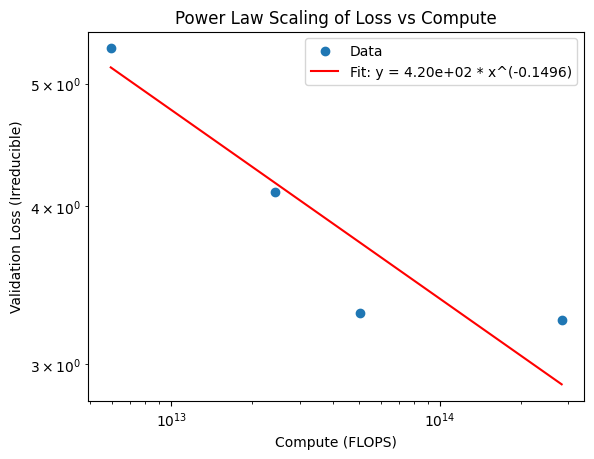

In [14]:
#plot of compute vs validation loss for each experiment and fit a power law

final_val_loss = [last_line_32['validation_loss'], last_line_64['validation_loss'], last_line_128['validation_loss'], last_line_256['validation_loss']]
final_compute = [last_line_32['total_flops_profiler'], last_line_64['total_flops_profiler'], last_line_128['total_flops_profiler'], last_line_256['total_flops_profiler']]

print(final_val_loss)
final_val_loss_irreducible = [val - 1.76 for val in final_val_loss]

# Fit a power law: y = a * x^b
import numpy as np
from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, b)

# Convert to numpy arrays
x_data = np.array(final_compute)
y_data = np.array(final_val_loss_irreducible)

# Fit the power law
params, covariance = curve_fit(power_law, x_data, y_data)
a, b = params
print(f"Power law fit: y = {a:.4e} * x^({b:.4f})")

# Generate fitted curve for plotting
x_fit = np.logspace(np.log10(min(x_data)), np.log10(max(x_data)), 100)
y_fit = power_law(x_fit, a, b)

# Plot the data and the fit
plt.scatter(final_compute, final_val_loss_irreducible, label='Data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y = {a:.2e} * x^({b:.4f})')
plt.xlabel('Compute (FLOPS)')
plt.ylabel('Validation Loss (Irreducible)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Power Law Scaling of Loss vs Compute')
plt.show()